In [31]:
import torch
import torchvision
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
import random

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

100.0%
100.0%
100.0%
100.0%


In [90]:
class AutoEncoder(torch.nn.Module):
    def __init__(self,nb_in):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(nb_in,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,10),
            torch.nn.ReLU(),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,nb_in),
            torch.nn.Unflatten(1,(28,28))
        )
    def forward(self,x):
        encode =self.encoder(x)
        return self.decoder(encode)

In [91]:
autoencoder = AutoEncoder(28*28)
optimizer = torch.optim.Adam(autoencoder.parameters())
loss = torch.nn.MSELoss()

c:\Users\minhh\Downloads\WorkHome\Python\FastAI\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([128, 1, 28, 28])) that is different to the input size (torch.Size([128, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


9


c:\Users\minhh\Downloads\WorkHome\Python\FastAI\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([96, 1, 28, 28])) that is different to the input size (torch.Size([96, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


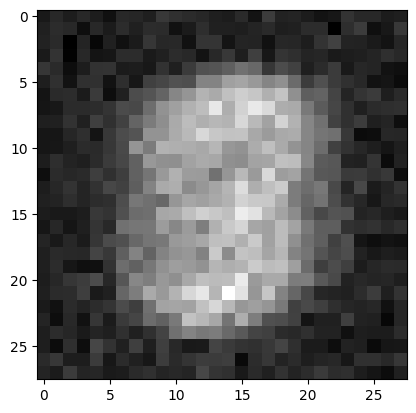

1


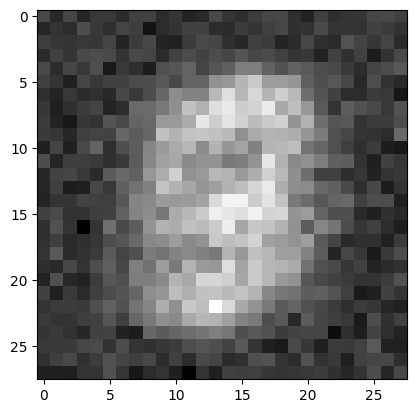

5


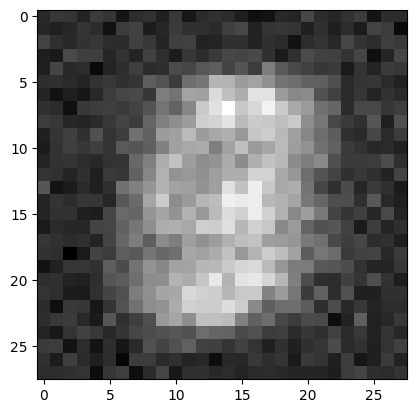

3


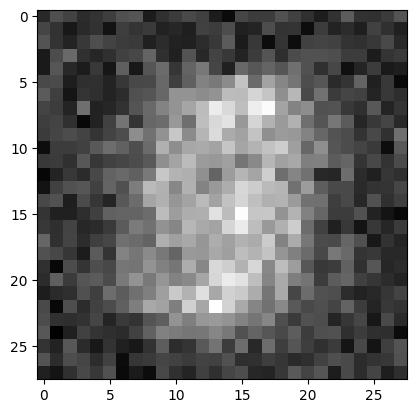

8


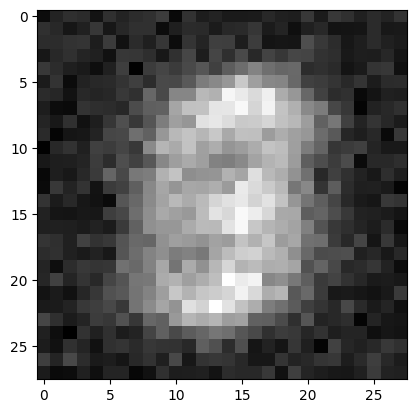

4


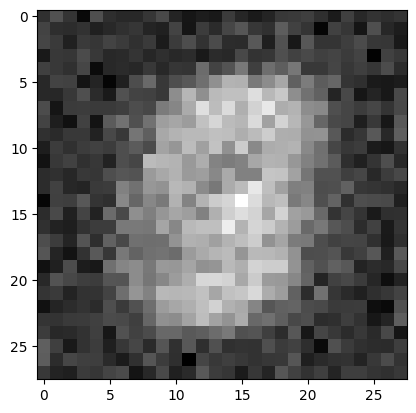

8


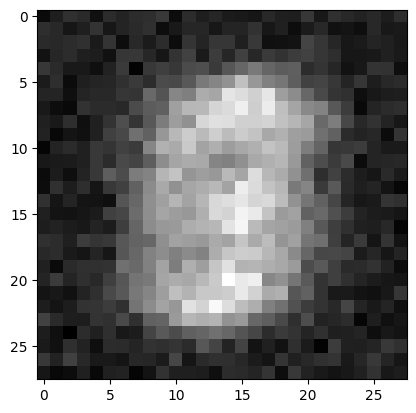

4


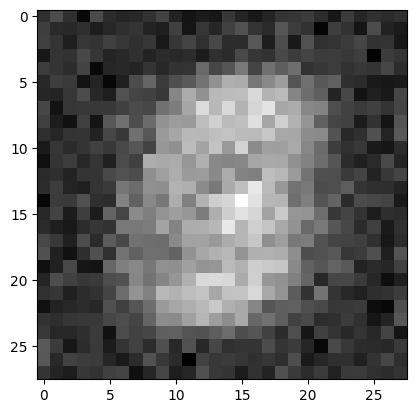

7


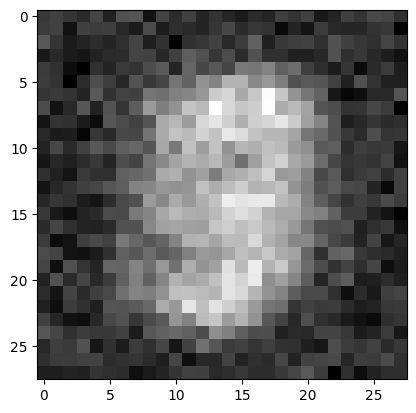

4


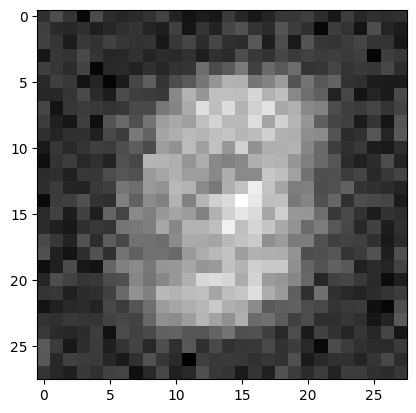

3


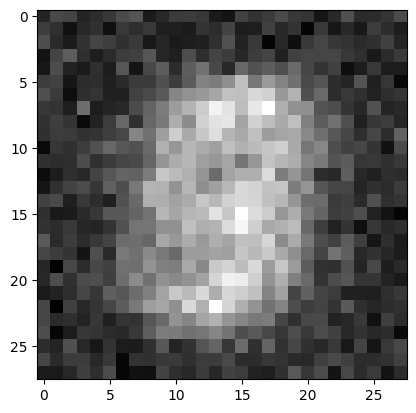

4


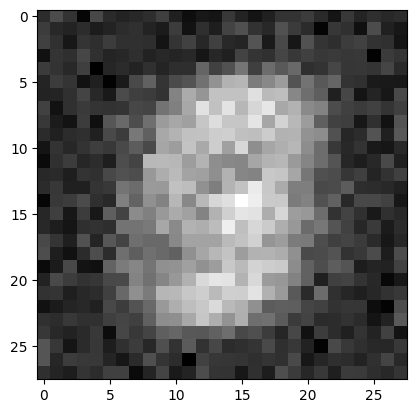

3


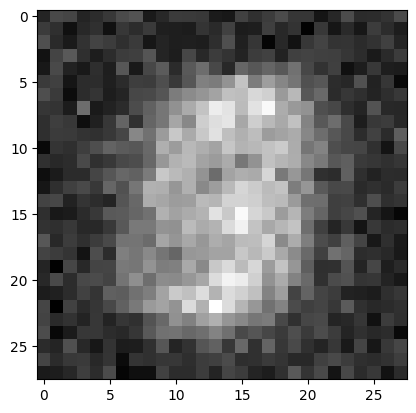

4


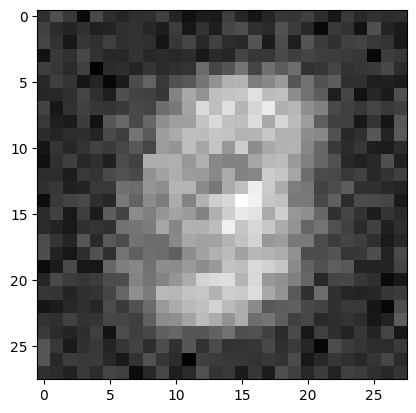

2


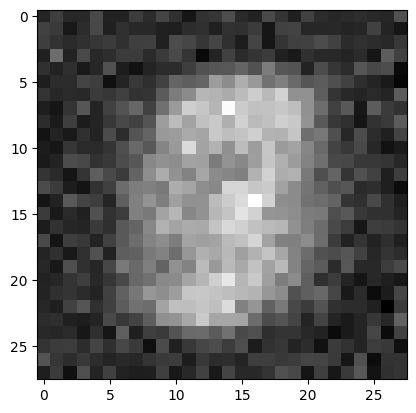

2


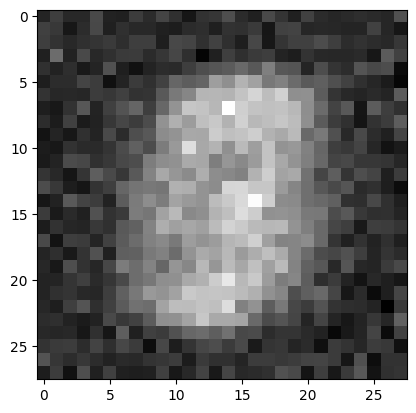

7


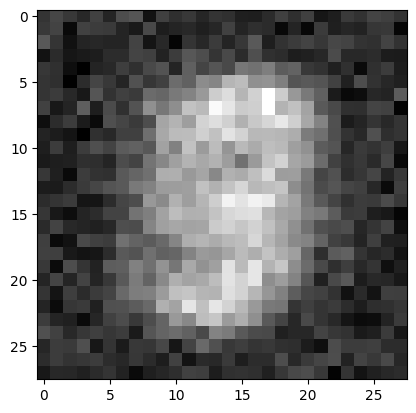

6


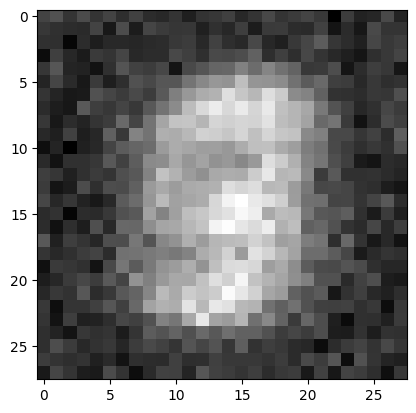

6


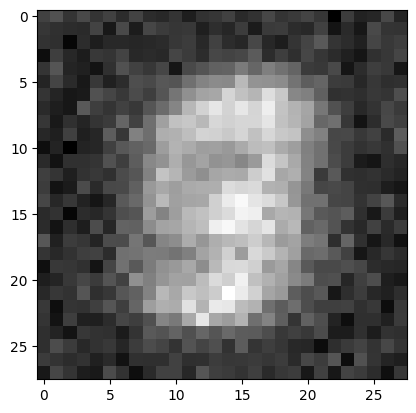

3


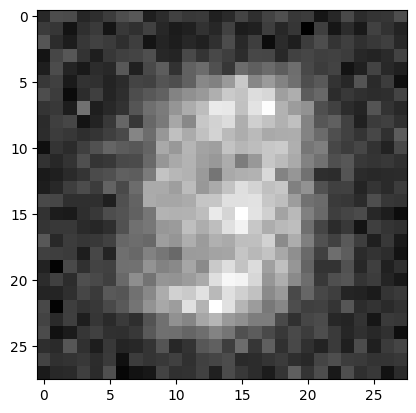

0


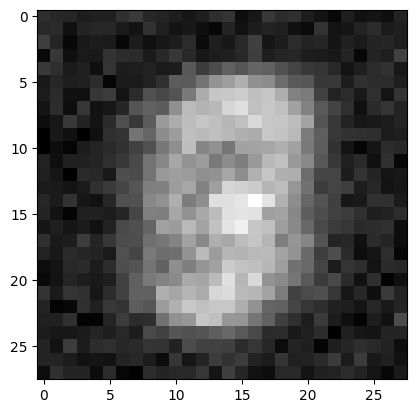

2


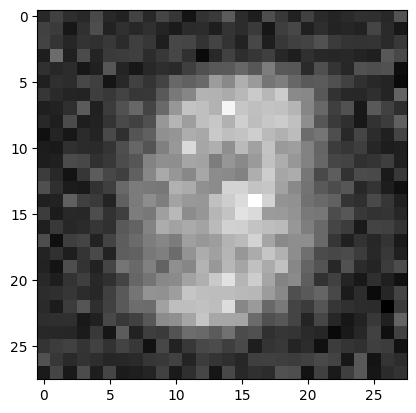

3


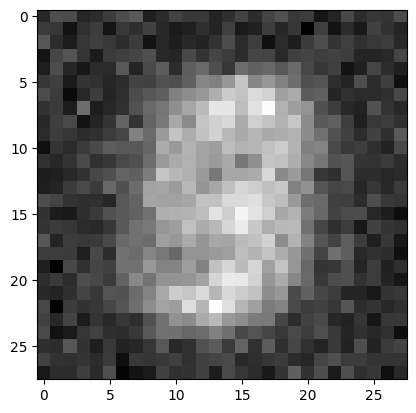

3


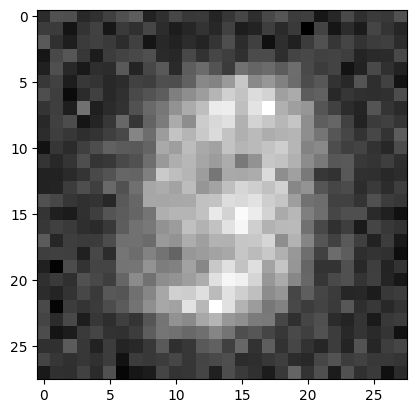

9


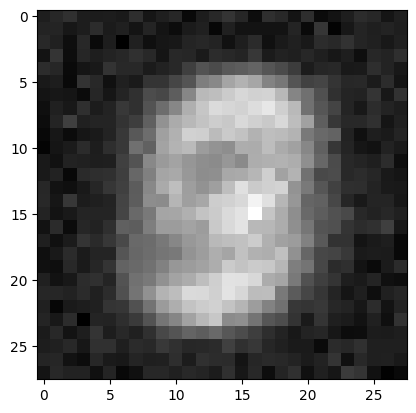

7


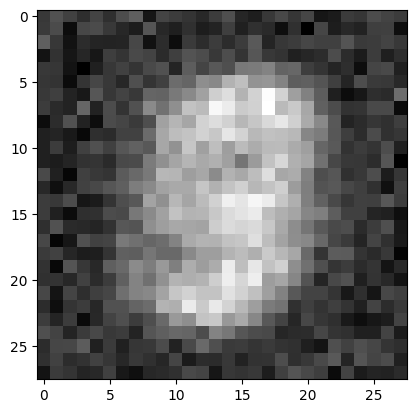

2


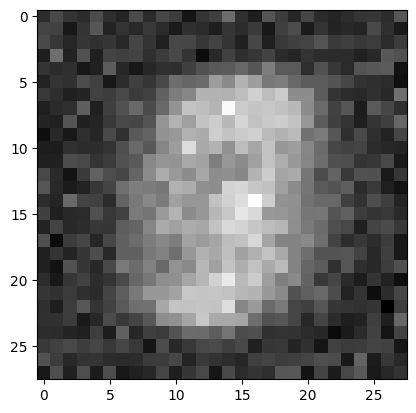

4


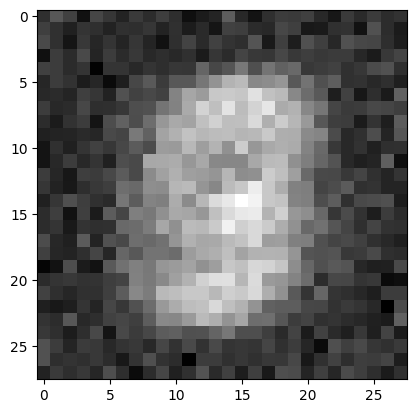

2


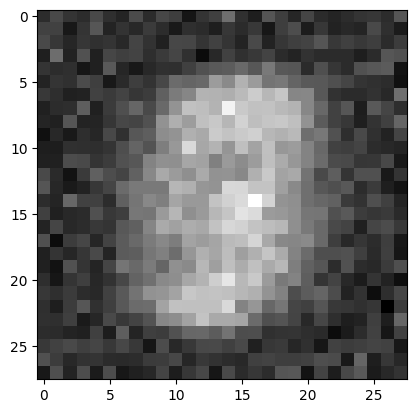

0


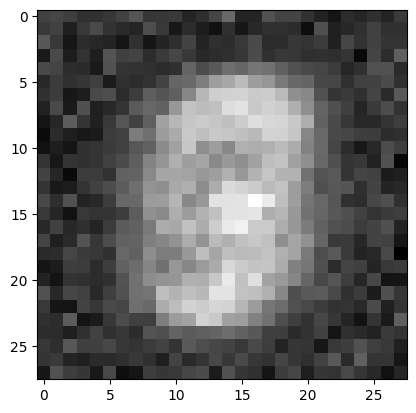

5


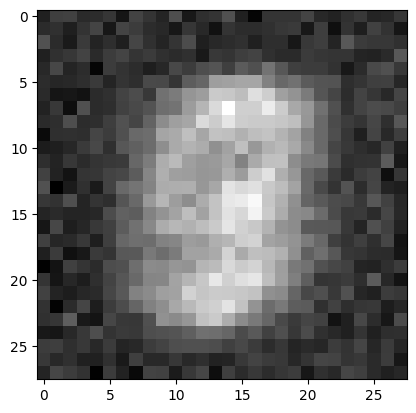

7


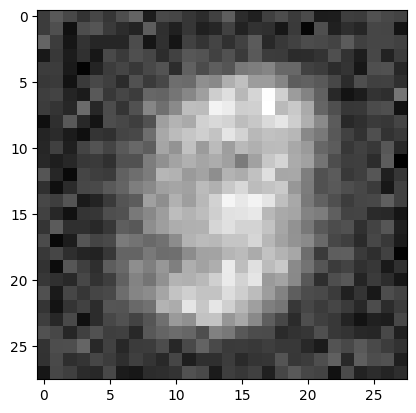

9


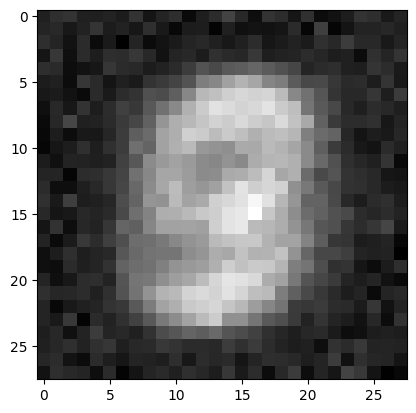

1


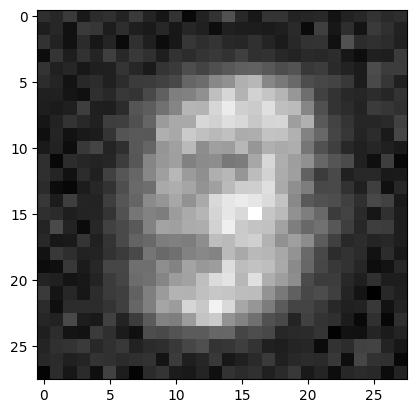

9


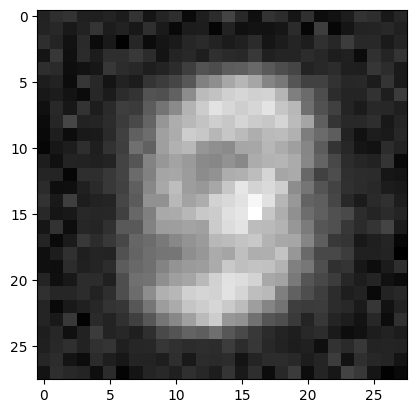

5


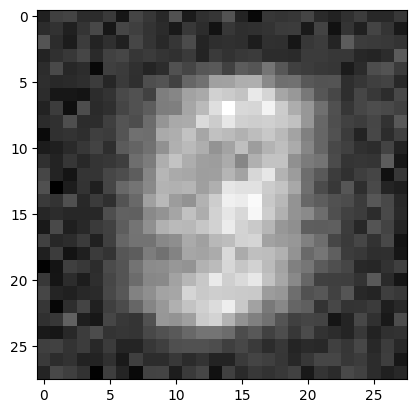

7


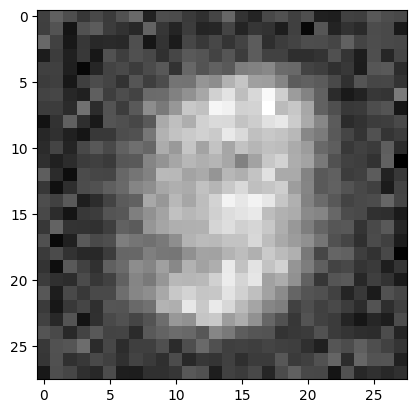

1


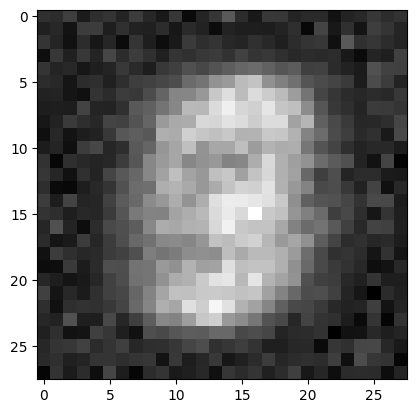

3


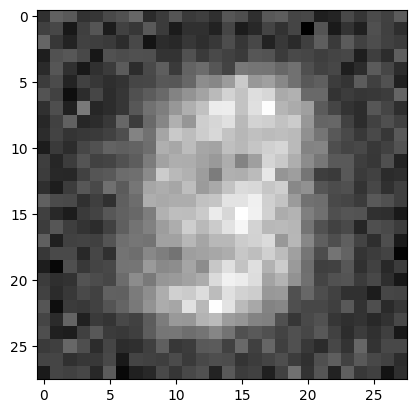

8


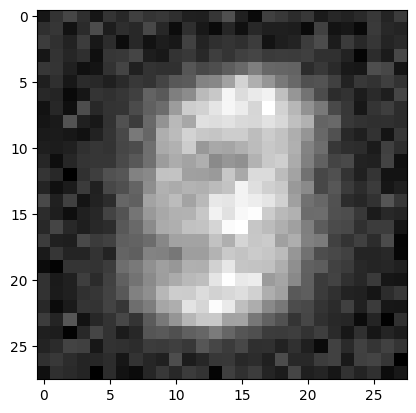

8


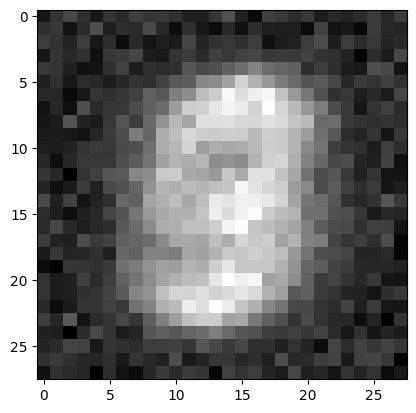

1


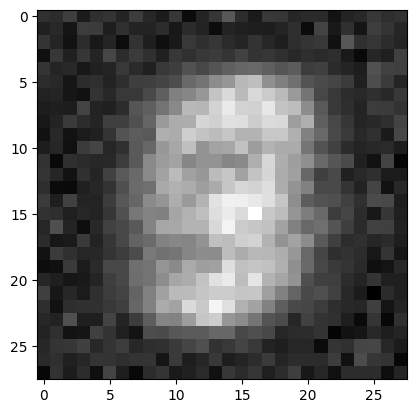

7


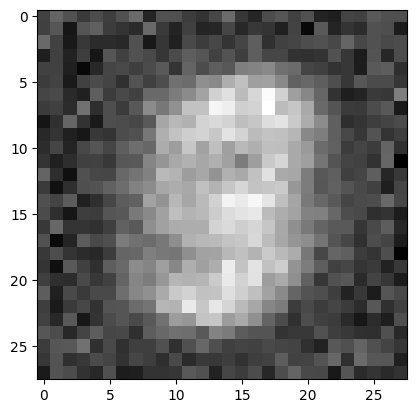

9


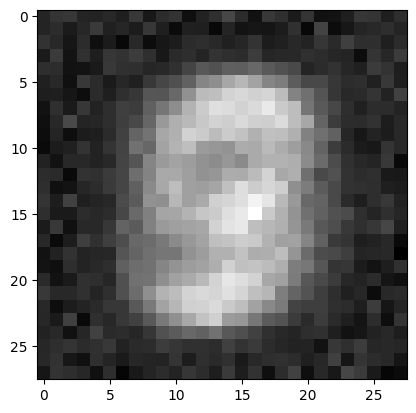

0


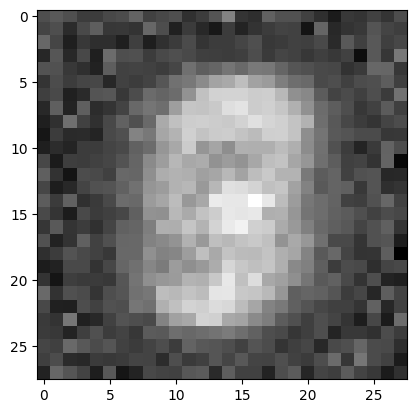

9


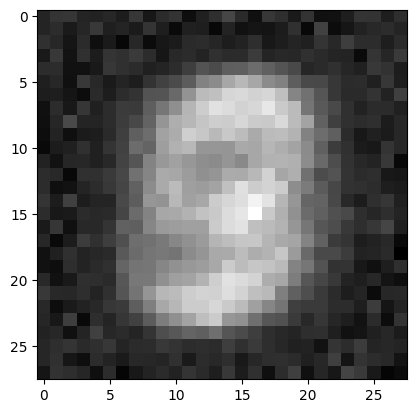

8


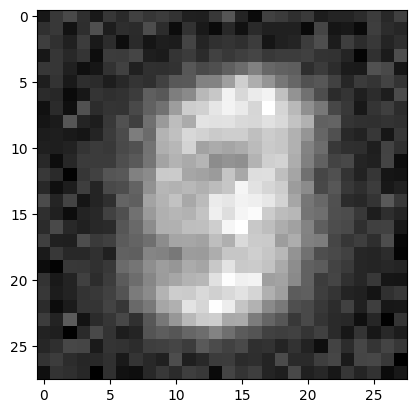

4


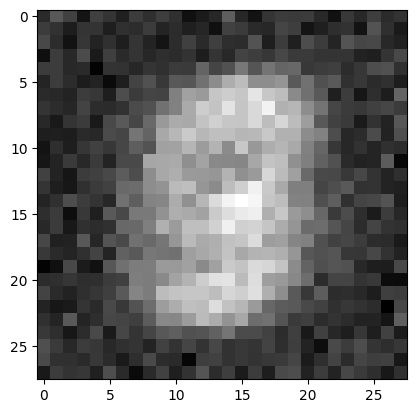

8


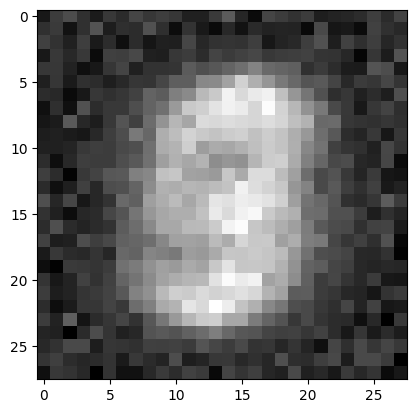

2


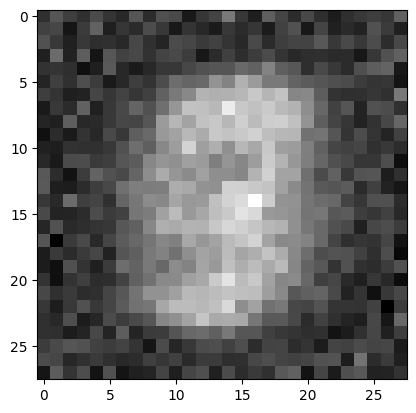

3


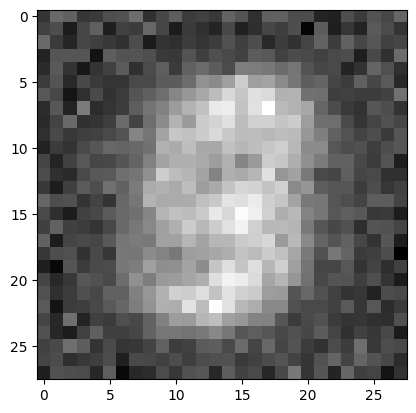

5


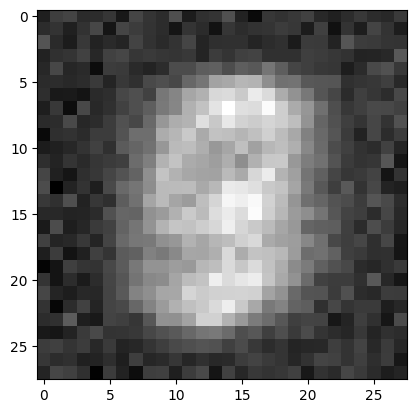

KeyboardInterrupt: 

In [92]:

dataloader = torch.utils.data.DataLoader(training_data, batch_size=128, shuffle=True)

for epoch in range(1000):
    for img,index in dataloader:
        optimizer.zero_grad()
        pred = autoencoder(img)
        img_loss = loss(pred,img)
        img_loss.backward()
        optimizer.step()

    randomIdx = random.randint(0, len(labels_map)-1)
    print(randomIdx)
    inp = torch.zeros(len(labels_map))
    inp[randomIdx] = 1
    inp = inp.unsqueeze(0)  # Add batch dimension

    pred = autoencoder.decoder(inp)
    plt.imshow(pred.view(28, 28).detach(), cmap='gray')
    plt.show()
    

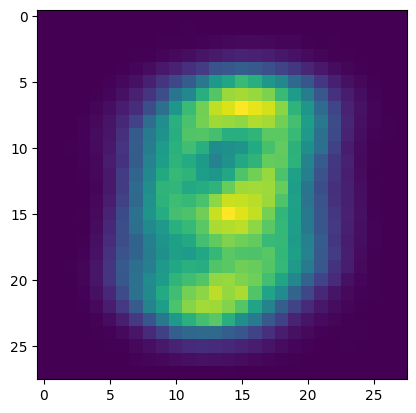

In [88]:
inp = torch.zeros(len(labels_map))
inp[1] = 1
inp = inp.unsqueeze(0)
test = autoencoder.decoder(inp)
plt.imshow(test.detach() .view(28,28))
plt.show()